In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [263]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
df = pd.read_csv('/content/drive/MyDrive/crawldata/AIL303m _ AI1802 _ LêTrungTá/house_price_data2.csv')

In [265]:
df.head(30)

,area,price,Adress,floor,facade,road_in,car_parking,bedrooms,wc
0,59.0,17.50,"Phường Yên Hòa, Quận Cầu Giấy",6,6,4,2,4,6
1,71.0,13.80,"Phuong Khuong Trung, Thanh Xuan",5,6,6,0,4,4
2,45.0,9.00,"Phuong Khuong Trung, Thanh Xuan",6,5,6,0,4,6
3,45.0,9.50,"Phường Hàng Bồ, Quận Hoàn Kiếm",0,0,0,0,0,0
4,51.0,18.00,"Phường Liễu Giai, Quận Ba Đình",5,7,0,1,5,5
5,64.0,34.00,"Phường Quan Hoa, Quận Cầu Giấy",7,0,0,2,4,7
6,59.0,16.50,"Phường Vĩnh Phúc, Quận Ba Đình",5,4,0,1,4,0
7,107.0,59.00,"Phường Dịch Vọng, Quận Cầu Giấy",8,55,50,2,8,10
8,51.0,11.00,"Phường Thụy Khuê, Quận Tây Hồ",4,0,0,1,3,3
9,217.0,88.00,"Phường Ô Chợ Dừa, Quận Đống Đa",9,0,0,4,10,10


In [266]:
df.shape

(8924, 9)

In [267]:
# Thay thế giá trị 0 bằng NaN
df.replace(0, np.nan, inplace=True)

In [268]:
df.isnull().sum()

area              0
price           339
Adress            0
floor          1620
facade         2009
road_in        2549
car_parking    5381
bedrooms       3037
wc             3703
dtype: int64

In [269]:
df.dtypes

area           float64
price          float64
Adress          object
floor          float64
facade         float64
road_in        float64
car_parking    float64
bedrooms       float64
wc             float64
dtype: object

In [270]:
#Loại bỏ các giá trị ảo như giá nhà = 0
house_data=df
house_data = house_data[(house_data['price'].notnull()) & (house_data['floor'].notnull()) & (house_data['bedrooms'].notnull()) & (house_data['wc'].notnull())]
len(house_data)

5040

In [271]:
house_data.head(20)

,area,price,Adress,floor,facade,road_in,car_parking,bedrooms,wc
0,59.0,17.50,"Phường Yên Hòa, Quận Cầu Giấy",6.0,6.0,4.0,2.0,4.0,6.0
1,71.0,13.80,"Phuong Khuong Trung, Thanh Xuan",5.0,6.0,6.0,NaN,4.0,4.0
2,45.0,9.00,"Phuong Khuong Trung, Thanh Xuan",6.0,5.0,6.0,NaN,4.0,6.0
4,51.0,18.00,"Phường Liễu Giai, Quận Ba Đình",5.0,7.0,NaN,1.0,5.0,5.0
5,64.0,34.00,"Phường Quan Hoa, Quận Cầu Giấy",7.0,NaN,NaN,2.0,4.0,7.0
7,107.0,59.00,"Phường Dịch Vọng, Quận Cầu Giấy",8.0,55.0,50.0,2.0,8.0,10.0
8,51.0,11.00,"Phường Thụy Khuê, Quận Tây Hồ",4.0,NaN,NaN,1.0,3.0,3.0
9,217.0,88.00,"Phường Ô Chợ Dừa, Quận Đống Đa",9.0,NaN,NaN,4.0,10.0,10.0
11,42.0,7.00,"Phường Văn Quán, Quận Hà Đông",5.0,35.0,8.0,2.0,3.0,4.0
12,40.0,6.00,"Phường Quang Trung, Quận Hà Đông",3.0,5.0,8.0,2.0,4.0,2.0


<Axes: ylabel='wc'>

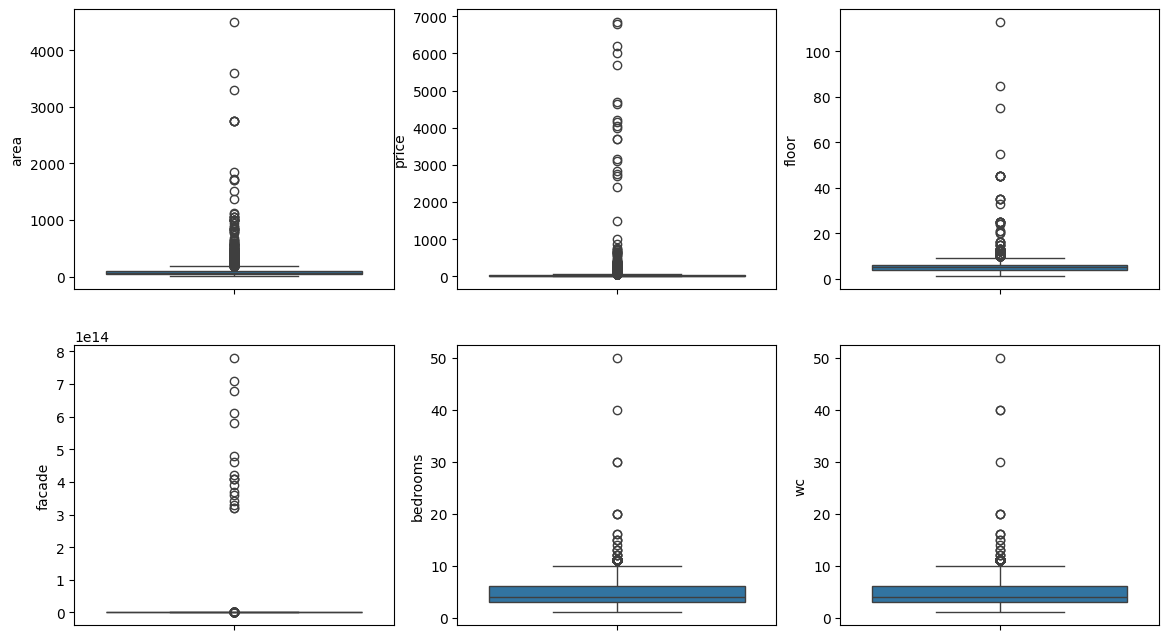

In [272]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(14,8))
sb.boxplot(house_data['area'],ax=axs[0,0])
sb.boxplot(house_data['price'],ax=axs[0,1])
sb.boxplot(house_data['floor'],ax=axs[0,2])
sb.boxplot(house_data['facade'],ax=axs[1,0])
sb.boxplot(house_data['bedrooms'],ax=axs[1,1])
sb.boxplot(house_data['wc'],ax=axs[1,2])

In [273]:
house_data = house_data[(house_data['price'] <= 100) & (house_data['area'] <= 200) & (house_data['wc'] <= 10) & (house_data['bedrooms'] <= 10) & (house_data['floor'] <= 10)]
house_data.head(20)

,area,price,Adress,floor,facade,road_in,car_parking,bedrooms,wc
0,59.0,17.50,"Phường Yên Hòa, Quận Cầu Giấy",6.0,6.0,4.0,2.0,4.0,6.0
1,71.0,13.80,"Phuong Khuong Trung, Thanh Xuan",5.0,6.0,6.0,NaN,4.0,4.0
2,45.0,9.00,"Phuong Khuong Trung, Thanh Xuan",6.0,5.0,6.0,NaN,4.0,6.0
4,51.0,18.00,"Phường Liễu Giai, Quận Ba Đình",5.0,7.0,NaN,1.0,5.0,5.0
5,64.0,34.00,"Phường Quan Hoa, Quận Cầu Giấy",7.0,NaN,NaN,2.0,4.0,7.0
7,107.0,59.00,"Phường Dịch Vọng, Quận Cầu Giấy",8.0,55.0,50.0,2.0,8.0,10.0
8,51.0,11.00,"Phường Thụy Khuê, Quận Tây Hồ",4.0,NaN,NaN,1.0,3.0,3.0
11,42.0,7.00,"Phường Văn Quán, Quận Hà Đông",5.0,35.0,8.0,2.0,3.0,4.0
12,40.0,6.00,"Phường Quang Trung, Quận Hà Đông",3.0,5.0,8.0,2.0,4.0,2.0
14,48.0,13.00,"Phường Quang Trung, Quận Hà Đông",6.0,4.0,10.0,2.0,4.0,5.0


<Axes: ylabel='wc'>

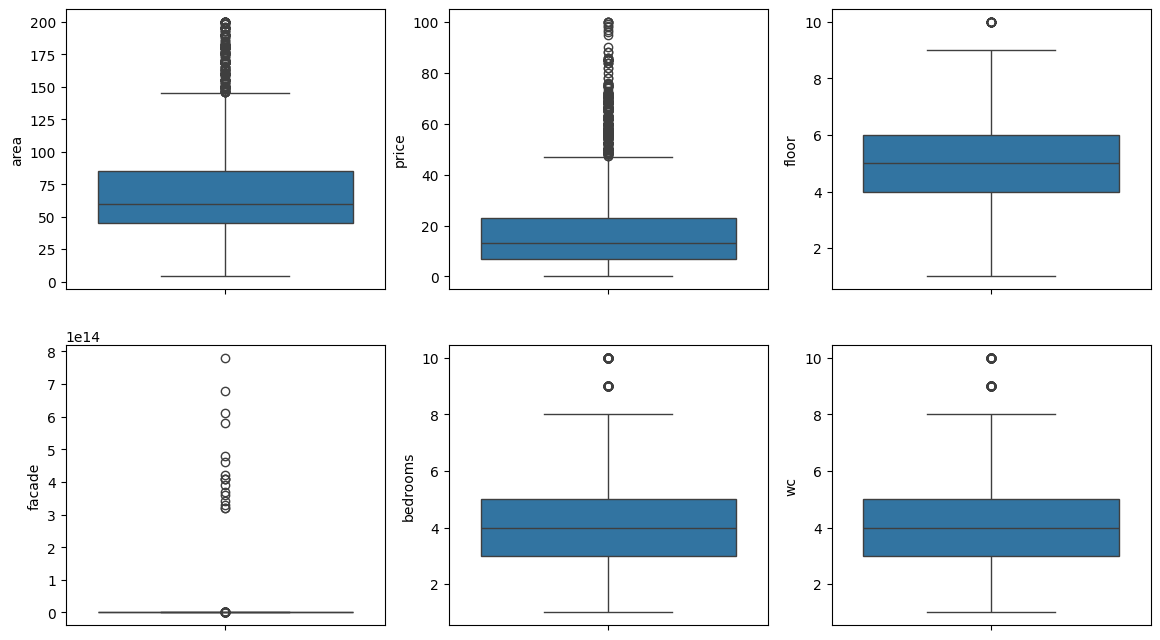

In [274]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(14,8))
sb.boxplot(house_data['area'],ax=axs[0,0])
sb.boxplot(house_data['price'],ax=axs[0,1])
sb.boxplot(house_data['floor'],ax=axs[0,2])
sb.boxplot(house_data['facade'],ax=axs[1,0])
sb.boxplot(house_data['bedrooms'],ax=axs[1,1])
sb.boxplot(house_data['wc'],ax=axs[1,2])

In [275]:
q1_pr=np.percentile(house_data['price'],25)
q2_pr=np.percentile(house_data['price'],75)
iqr_pr=q2_pr-q1_pr
lower_pr=q1_pr - 1.5*iqr_pr
upper_pr=q2_pr + 1.5*iqr_pr
data=house_data[(house_data['price']>=lower_pr) & (house_data['price']<=upper_pr)]

In [276]:
q1_ar=np.percentile(house_data['area'],25)
q2_ar=np.percentile(house_data['area'],75)
iqr_ar=q2_ar-q1_ar
lower_ar=q1_ar-1.5*iqr_ar
upper_ar=q2_ar+1.5*iqr_ar
data=data[(house_data['area']>=lower_ar) & (house_data['area']<=upper_ar)]

<ipython-input-276-4733dad68736>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[(house_data['area']>=lower_ar) & (house_data['area']<=upper_ar)]


In [277]:
# Kiểm tra và thay đổi giá trị trong cột "address"
house_data.loc[house_data['Adress'].str.contains('Hà Đông'), 'Adress'] = '0'
house_data.loc[house_data['Adress'].str.contains('Bắc Từ Liêm'), 'Adress'] = "1"
house_data.loc[house_data['Adress'].str.contains('Nam Từ Liêm'), 'Adress'] = "2"
house_data.loc[house_data['Adress'].str.contains('Long Biên'), 'Adress'] = "3"
house_data.loc[house_data['Adress'].str.contains('Hoàng Mai'), 'Adress'] = "4"
house_data.loc[house_data['Adress'].str.contains('Thanh Xuân'), 'Adress'] = "5"
house_data.loc[house_data['Adress'].str.contains('Cầu Giấy'), 'Adress'] = "6"
house_data.loc[house_data['Adress'].str.contains('Đống Đa'), 'Adress'] = "7"
house_data.loc[house_data['Adress'].str.contains('Ba Đình'), 'Adress'] = "8"
house_data.loc[house_data['Adress'].str.contains('Tây Hồ'), 'Adress'] = "9"
house_data.loc[house_data['Adress'].str.contains('Hai Bà Trưng'), 'Adress'] = "10"
house_data.loc[house_data['Adress'].str.contains('Hoàn Kiếm'), 'Adress'] = "11"
mask = house_data['Adress'].str.contains('0|1|2|3|4|5|6|7|8|9|10|11')
house_data=house_data[mask]

In [316]:
house_data.head(20)

,area,price,Adress,floor,facade,road_in,car_parking,bedrooms,wc
0,59.0,17.50,6.0,6.0,6.0,4.0,2.0,4.0,6.0
4,51.0,18.00,8.0,5.0,7.0,0.0,1.0,5.0,5.0
5,64.0,34.00,6.0,7.0,0.0,0.0,2.0,4.0,7.0
7,107.0,59.00,6.0,8.0,55.0,50.0,2.0,8.0,10.0
8,51.0,11.00,9.0,4.0,0.0,0.0,1.0,3.0,3.0
11,42.0,7.00,0.0,5.0,35.0,8.0,2.0,3.0,4.0
12,40.0,6.00,0.0,3.0,5.0,8.0,2.0,4.0,2.0
14,48.0,13.00,0.0,6.0,4.0,10.0,2.0,4.0,5.0
15,40.0,8.00,0.0,5.0,4.0,8.0,2.0,4.0,4.0
16,56.0,13.00,7.0,4.0,4.0,8.0,1.0,3.0,3.0


In [279]:
house_data['Adress'] = house_data['Adress'].astype(float)

In [280]:
#tập dữ liệu để phân loại
cat=house_data.select_dtypes('float')
cat.columns

Index(['area', 'price', 'Adress', 'floor', 'facade', 'road_in', 'car_parking',
       'bedrooms', 'wc'],
      dtype='object')

<Axes: >

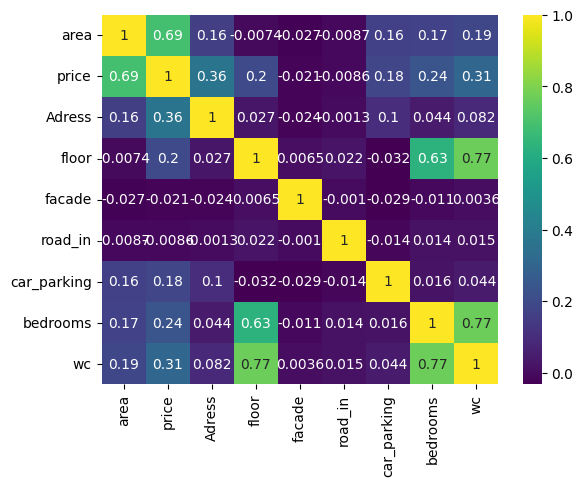

In [281]:
#checking correlation with heatmap
cor=cat.corr()
sb.heatmap(cor,annot=True,cmap='viridis')

<ipython-input-314-ea6c54c6fa4c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(house_data['bedrooms'], color='blue', label='Bedrooms')
<ipython-input-314-ea6c54c6fa4c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(house_data['wc'], color='green', label='wc')


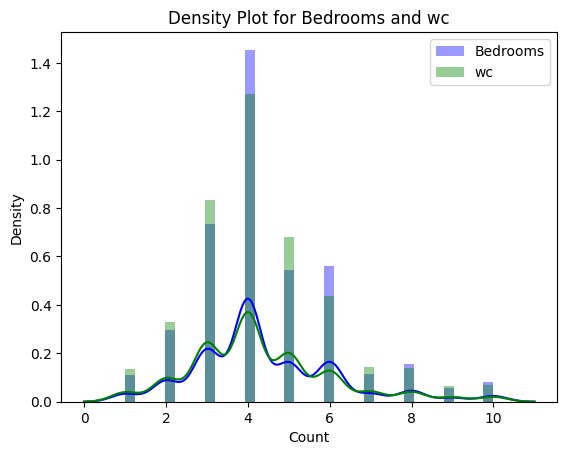

In [314]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create density plots for 'bedrooms' and 'wc' columns
sb.distplot(house_data['bedrooms'], color='blue', label='Bedrooms')
sb.distplot(house_data['wc'], color='green', label='wc')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Density Plot for Bedrooms and wc')

# Show the plot
plt.legend()
plt.show()

In [283]:
house_data.fillna(0, inplace=True)

In [284]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [285]:
x=house_data.drop(['price'],axis=1)
y=house_data['price']

In [286]:
#chia độ lệch
sc=StandardScaler()
sc.fit(x)
x=sc.fit_transform(x)

In [287]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3)

# Model Linear Regression



In [288]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
score=lr.score(xtest,ytest)
score

0.5816569440212844

In [289]:
pred=lr.predict(xtest)

In [290]:
mse=mean_squared_error(ytest,pred)
mae=mean_absolute_error(ytest,pred)
r2=r2_score(ytest,pred)
print(f"""Mean Absolute error:{mae}
Mean Squared Error: {mse}
r2 Score: {r2}""")

Mean Absolute error:7.033600812573016
Mean Squared Error: 108.5148408592242
r2 Score: 0.5816569440212844


In [291]:
def adj_r2(x, y, model):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [292]:
print(adj_r2(xtrain, ytrain, lr))

0.5878875431602891


In [293]:
print(adj_r2(xtest, ytest, lr))

0.578927136151929


# Lasso

In [294]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000,)
lasso_cv.fit(xtrain, ytrain)

LassoCV(cv=10, max_iter=100000)

In [295]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.06878562134473648

In [296]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.06878562134473648)

In [297]:
lasso.score(xtrain, ytrain)


0.588818900792645

In [298]:
print(adj_r2(xtrain, ytrain, lasso))

0.5876735495413711


In [299]:
print(adj_r2(xtest, ytest, lasso))

0.5790101294574784


# GridSearchCV
# Ridge Regression

In [307]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0.01, 100, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(xtrain, ytrain)

RidgeCV(alphas=array([77.95951077, 34.78828079, 46.03918698, 35.63069068, 50.23542111,
       82.06646399, 91.10918906, 54.64851761, 87.67965206, 64.83685155,
       20.92534654, 64.8187258 , 22.39879213, 62.18815365, 87.66970732,
       69.56020486, 51.62109317,  7.73551139, 63.10152541, 88.85044407,
       98.75487495, 86.3173163 , 33.81195938, 35.32530495,  9.69307821,
       35.96530436, 38.15055565,  3.96079236, 61.04795998, 86.18112092,
        6.11644906, 22.29928237, 93.47926772, 53.67039139, 29.58705654,
       57.28016036, 53.91108639, 64.58946092, 50.56318475, 80.22467768,
       64.14216518, 89.89299488, 71.61111748, 92.76638333, 99.0867689 ,
       60.60324262, 31.37947247, 15.44197733, 93.02627655, 34.32479466]),
        cv=10)

In [308]:
alpha = ridge_cv.alpha_
alpha

15.44197732704641

In [309]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(xtrain, ytrain)

Ridge(alpha=15.44197732704641)

In [310]:
ridge.score(xtrain, ytrain)


0.5890152515879563

In [311]:
ridge.score(xtest, ytest)

0.5817493512983112

In [312]:
print(adj_r2(xtrain, ytrain, ridge))

0.5878704472748308


In [313]:
print(adj_r2(xtest, ytest, ridge))

0.5790201464128188
